In [1]:
#📚 Librerias básicas de visualización y de operaciones matemáticas
import pandas as pd
import numpy as np

#📋 Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


#👾# Machine Learning
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('2023.csv', encoding='latin-1')
produ =data.copy()

In [3]:
#Eliminamos las tres primeras filas que están vacías.
produ = produ.dropna()

#Convertimos la primera fila en el combre la columna.
nombres_columnas = produ.iloc[0]
produ.columns = nombres_columnas
produ = produ[1:]
produ.columns = [column.lower().replace(" ", "_") for column in produ.columns]

#Eliminamos las últimas filas.
produ= produ.head(19)

#Fijamos la primera columna como índice y la ponemos en snake case y minúscula
produ.set_index(produ.columns[0], inplace=True)
produ.columns = [column.lower().replace(" ", "_") for column in produ.columns]

#Previamente a pasarlo a Float reemplazamos algunos valores
produ = produ.replace(',', '.', regex=True)
produ = produ.replace('-', '0', regex=True)

#Pasamos a Float, añadimos la columna total y redondeamos
produ = produ.apply(pd.to_numeric, errors='coerce').astype(float)
produ['total'] = produ.sum(axis=1)
produ = produ.round(3)


<h2 style='color:#d48a13'>02. Inicio del EDA. </h2>

In [4]:
#Analizamos primeramente la distribución por meses, pero nos centraremos más en producción por fuente de energía
produ.describe()

,ene/23,feb/23,mar/23,abr/23,may/23,jun/23,jul/23,ago/23,sep/23,oct/23,nov/23,dic/23,total
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2511.369316,2288.650526,2524.952684,2259.322526,2264.461053,2240.424316,2489.246211,2476.840579,2185.053684,2198.003263,2271.575105,2375.025263,28084.924632
std,3935.221690,3455.557491,3840.060423,3390.658185,3422.152204,3350.839789,3763.094570,3755.570260,3356.956284,3344.031835,3589.491578,3640.506029,42169.340775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.717000,116.655500,112.060500,90.205500,78.119500,103.915500,113.718000,112.411000,110.938500,119.591500,95.590500,94.255000,1268.079500
50%,295.484000,357.333000,424.099000,611.590000,482.563000,321.791000,333.011000,417.216000,400.695000,372.646000,238.449000,254.562000,4694.460000
75%,3283.935500,3415.123500,3104.477500,3325.206000,3537.521500,3464.431000,4206.257000,4360.788500,3479.152000,3185.152000,3165.955500,3583.225500,41691.118500
max,13541.967000,11842.312000,12623.128000,11168.685000,11600.013000,11496.793000,12757.713000,12701.768000,12109.089000,10476.048000,12854.069000,12073.800000,134321.014000


In [5]:
#Análisis por origen 

fuente = data.copy()
fuente = fuente.dropna()


#Convertimos la primera fila en el combre la columna.
nombres_columnas = fuente.iloc[0]
fuente.columns = nombres_columnas
fuente = fuente[1:]
fuente.columns = [column.lower().replace(" ", "_") for column in fuente.columns]

#Seleccionamos la zona de estudio y trasponemos el índice con el nombre de las columnas
fuente = fuente.head(19)
fuente = fuente.transpose()

nombres_columnas = fuente.iloc[0]
fuente.columns = nombres_columnas
fuente = fuente[1:]
fuente.columns = [column.lower().replace(" ", "_") for column in fuente.columns]

#Previamente a pasarlo a Float reemplazamos algunos valores
fuente = fuente.replace(',', '.', regex=True)
fuente = fuente.replace('-', '0', regex=True)


#Pasamos a Float, añadimos la columna total y redondeamos
fuente = fuente.apply(pd.to_numeric, errors='coerce').astype(float)
#fuente['total'] = produ.sum(axis=1)
fuente = fuente.round(5)

fuente

,hidráulica,eólica,solar_fotovoltaica,solar_térmica,hidroeólica,otras_renovables,residuos_renovables,generación_renovable,turbinación_bombeo,nuclear,ciclo_combinado,carbón,motores_diésel,turbina_de_gas,turbina_de_vapor,fuel_+_gas,cogeneración,residuos_no_renovables,generación_no_renovable
ene/23,3859.36300,7457.30234,1744.40945,119.50776,1.64950,291.60596,68.12884,13541.96684,542.79745,5086.76359,2708.50787,295.48405,186.63206,64.15280,118.03039,0.0,1210.26929,103.40403,10316.04153
feb/23,2462.73392,4676.69352,2151.53069,178.78542,0.82934,357.33255,71.96249,9899.86793,260.87123,4597.95972,4367.51345,407.40199,195.87172,59.33186,118.05205,0.0,1720.05108,115.25887,11842.31197
mar/23,2043.47741,6693.38721,3094.57028,409.93962,1.57244,307.92666,72.25481,12623.12846,540.07980,5102.28966,3114.38497,424.09923,177.24924,51.35645,103.67924,0.0,1730.34172,120.44244,11363.92277
abr/23,1533.07315,4901.84724,3775.43567,625.72451,1.57334,273.10429,57.92693,11168.68513,611.59025,4567.25301,2874.97575,249.88844,184.15698,50.54132,89.16495,0.0,1576.06292,91.24581,10294.87943
may/23,1391.61533,5462.64267,3860.48319,500.29016,2.06720,337.49079,45.42399,11600.01332,482.56336,3741.76839,3333.27500,239.56192,194.11512,58.69239,84.88095,0.0,1706.15253,71.35762,9912.36728
jun/23,1913.25001,3081.34474,3847.51673,541.44322,0.80874,321.79098,81.08384,9787.23825,288.68311,4008.72121,4673.75831,300.82950,210.87249,77.46472,84.90544,0.0,1728.63245,122.92556,11496.79279
jul/23,1303.37373,3860.25552,4552.25791,768.13673,2.75906,319.82122,83.52140,10890.12557,317.62362,5123.14718,4950.49846,333.01135,243.09264,82.46038,101.06580,0.0,1480.44370,126.36964,12757.71277
ago/23,966.92184,4266.74574,4454.83115,719.76334,2.69983,339.93934,77.31578,10828.21703,417.21608,5008.27455,4999.42229,415.00730,260.85063,70.21682,105.31615,0.0,1305.95863,119.50577,12701.76822
sep/23,929.92184,3596.79269,3361.51111,400.78751,1.31499,284.94281,73.64918,8648.92013,351.92023,4546.81852,4866.76600,400.69478,219.41405,67.64365,105.51095,0.0,1433.95456,116.36641,12109.08914
oct/23,1445.54951,5764.25148,2628.56992,226.73820,0.44324,262.90564,76.52457,10404.98255,486.13971,3741.73402,4086.59015,372.64623,228.40624,74.98614,119.67770,0.0,1246.36318,119.50505,10476.04841


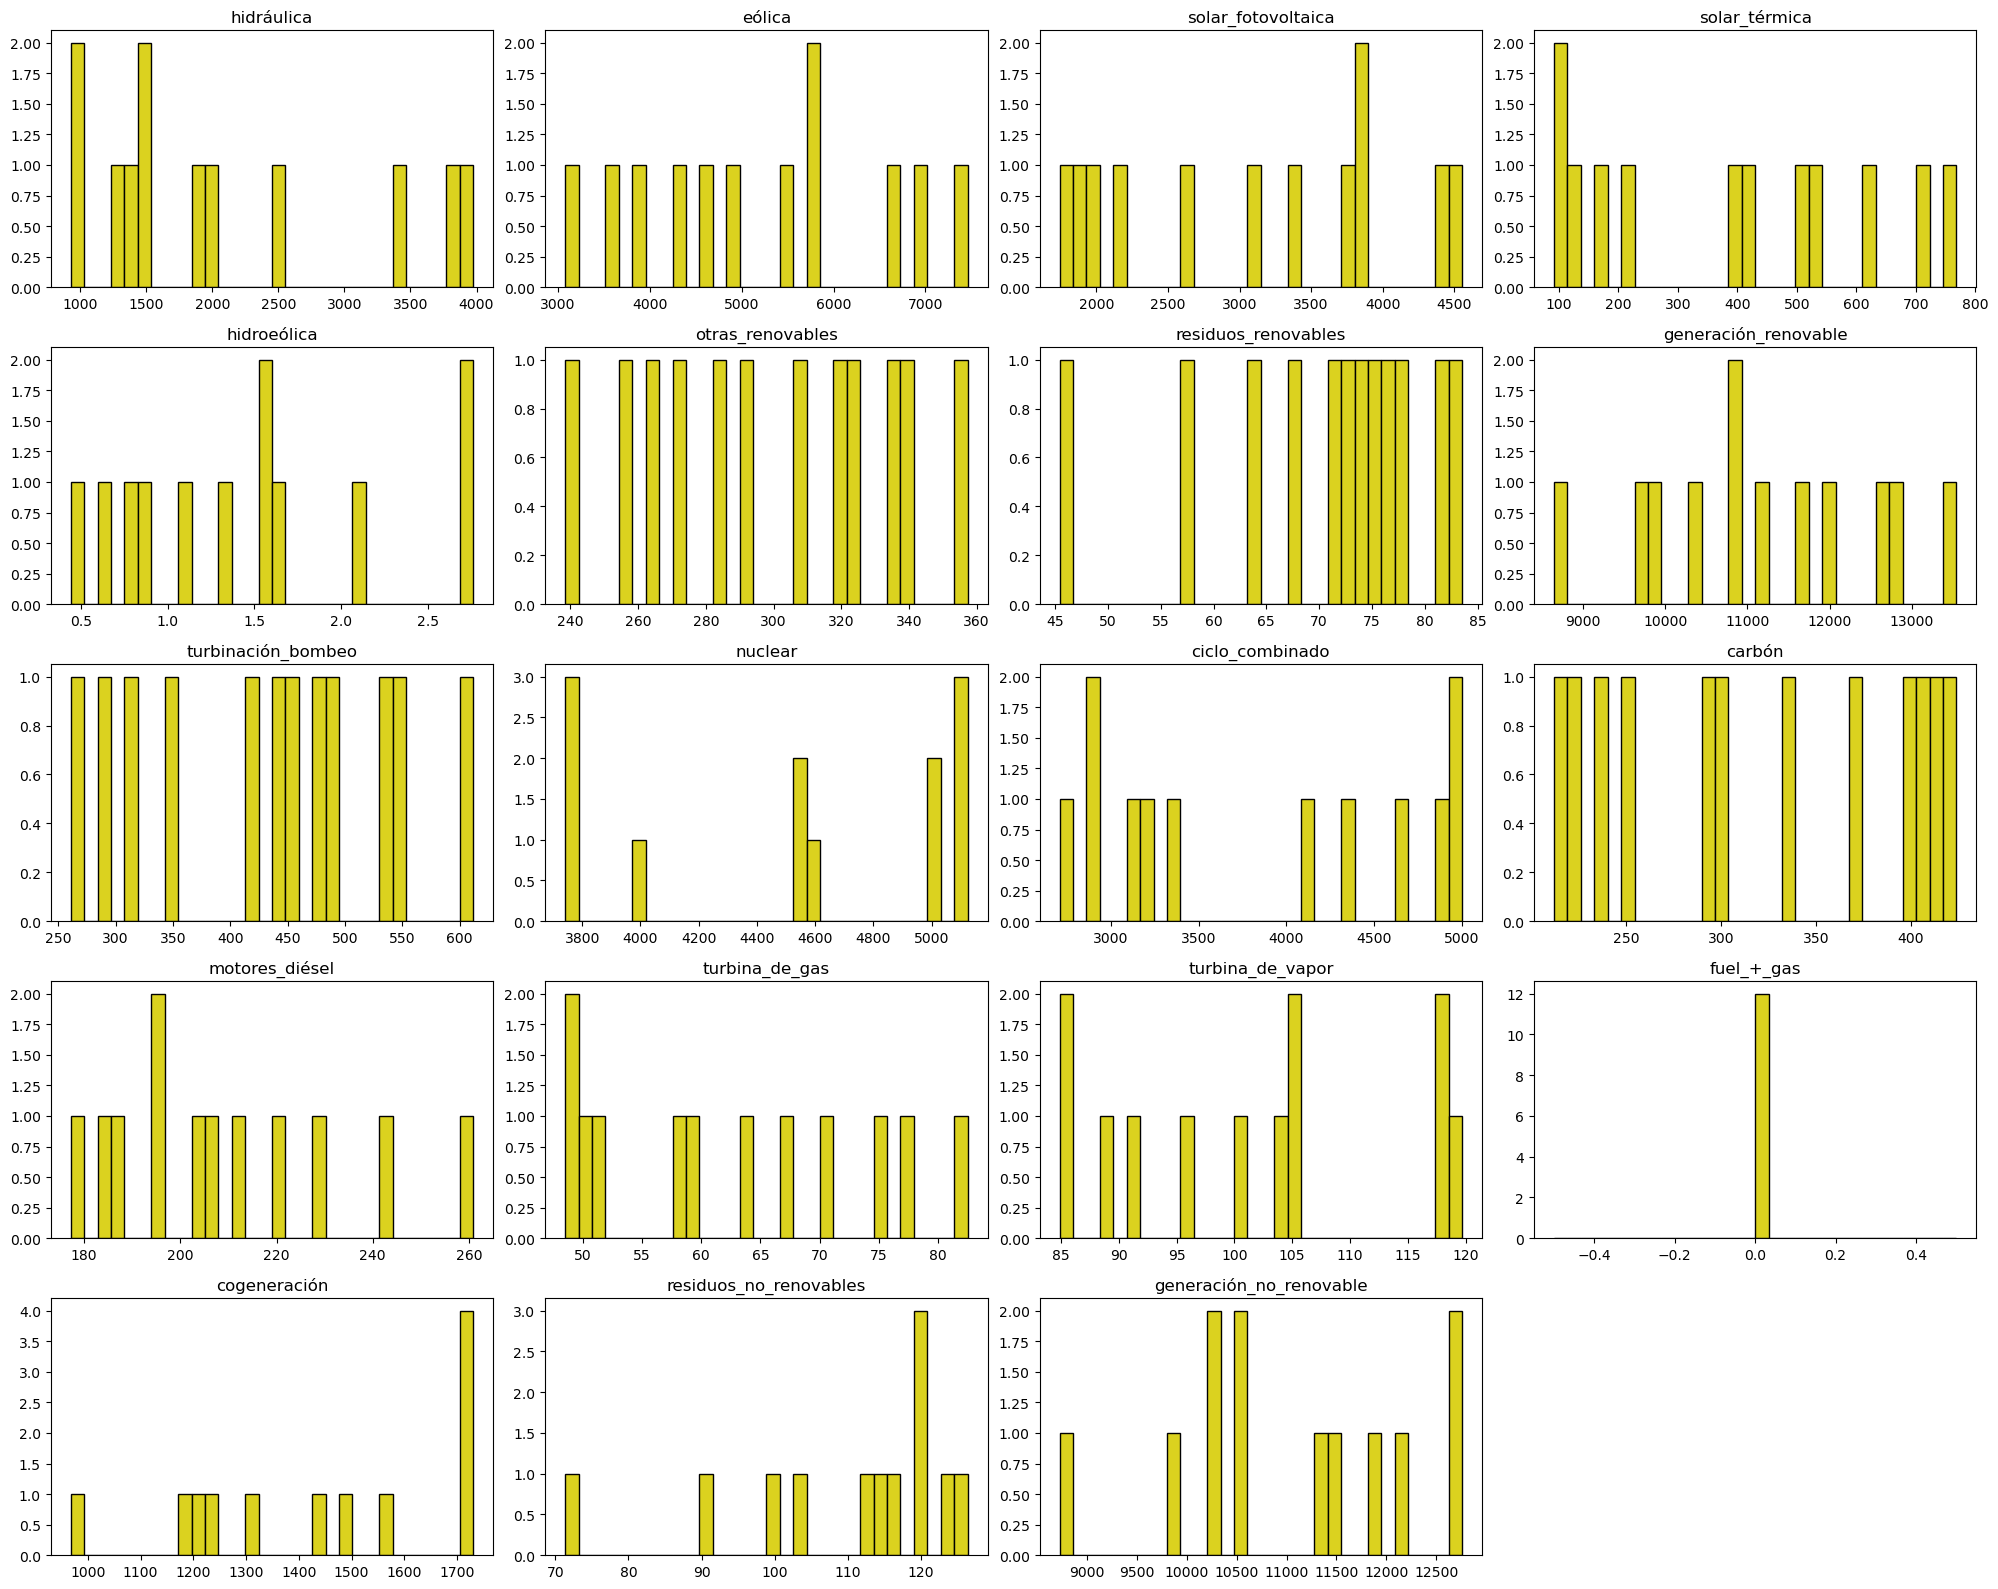

In [6]:
color = "#dbd21f"

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(fuente.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(fuente.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(fuente.columns[i])

plt.tight_layout()
plt.show()

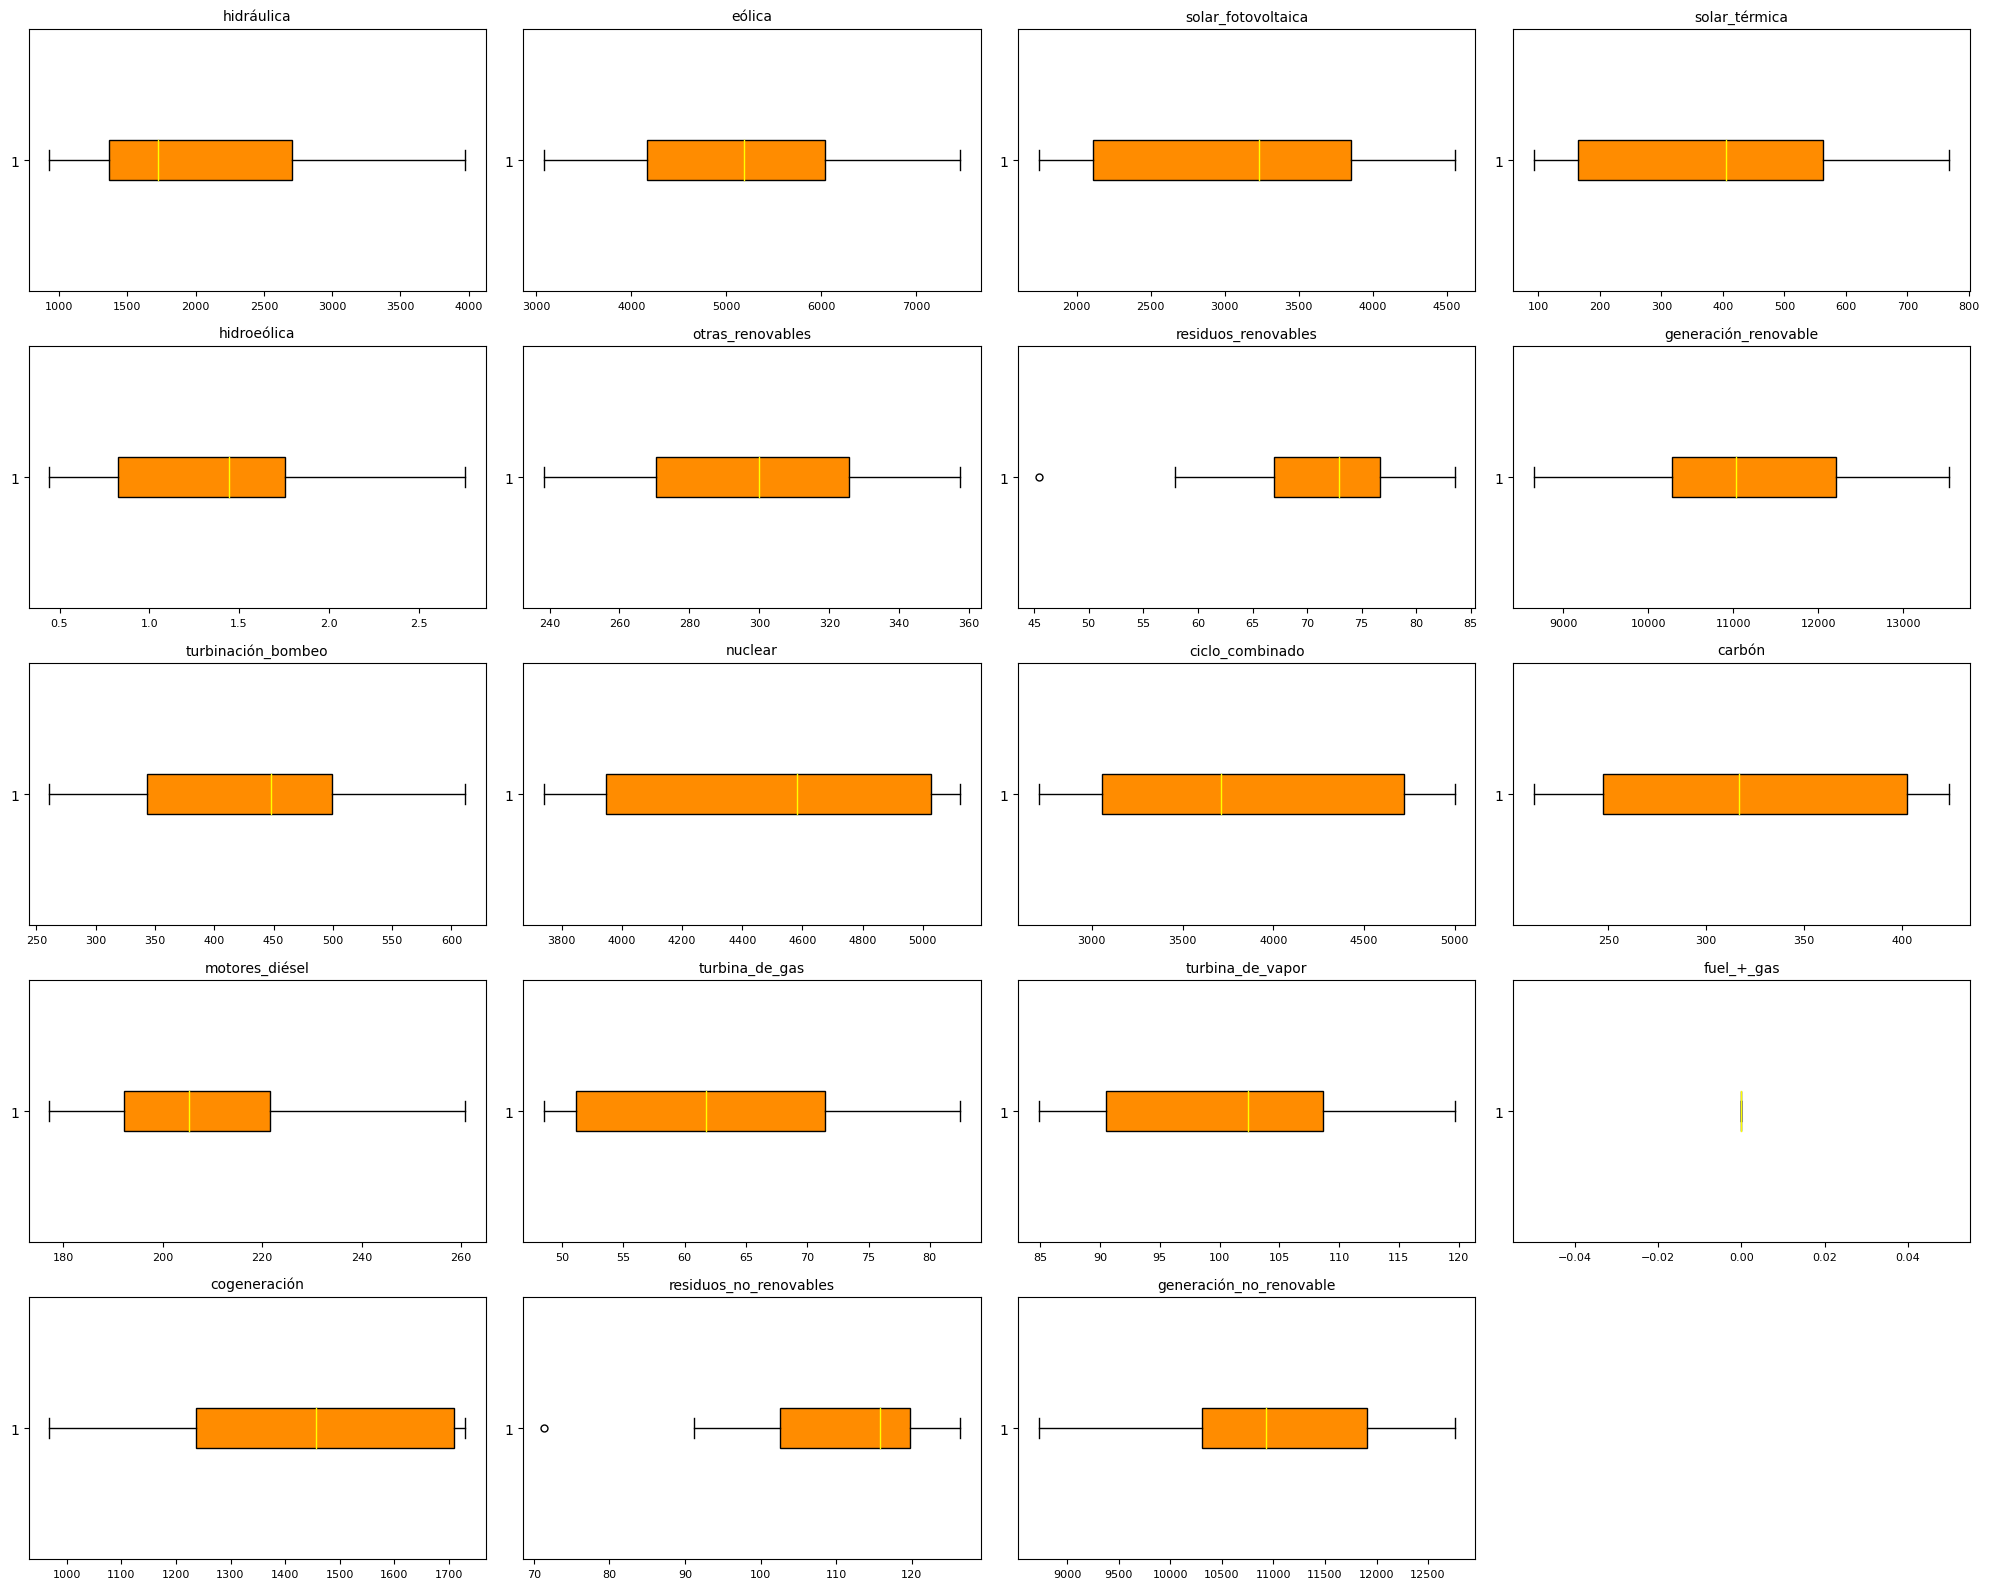

In [7]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(fuente.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(fuente.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(fuente.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

Con estos gráficos vemos la estabilidad que presenta el sistema, lo cual favorece que se puedan hacer predicciones de producción y de desarrollos futuros

In [8]:
#elimino la columna de 'fuel_+_gas' por la insignificancia de sus resultado y las columnas que hacen de sumatorio de la generación de energía

fuente = fuente.drop(columns = ['fuel_+_gas','generación_renovable','generación_no_renovable'],axis=1)
fuente.corrwith(fuente["carbón"]).sort_values(ascending=False)

carbón                    1.000000
turbina_de_vapor          0.630226
residuos_no_renovables    0.626085
ciclo_combinado           0.596968
residuos_renovables       0.500649
otras_renovables          0.496840
turbina_de_gas            0.410459
cogeneración              0.331176
nuclear                   0.324506
motores_diésel            0.315753
solar_fotovoltaica        0.238980
solar_térmica             0.234114
hidroeólica               0.149145
eólica                   -0.289279
turbinación_bombeo       -0.312103
hidráulica               -0.519429
dtype: float64

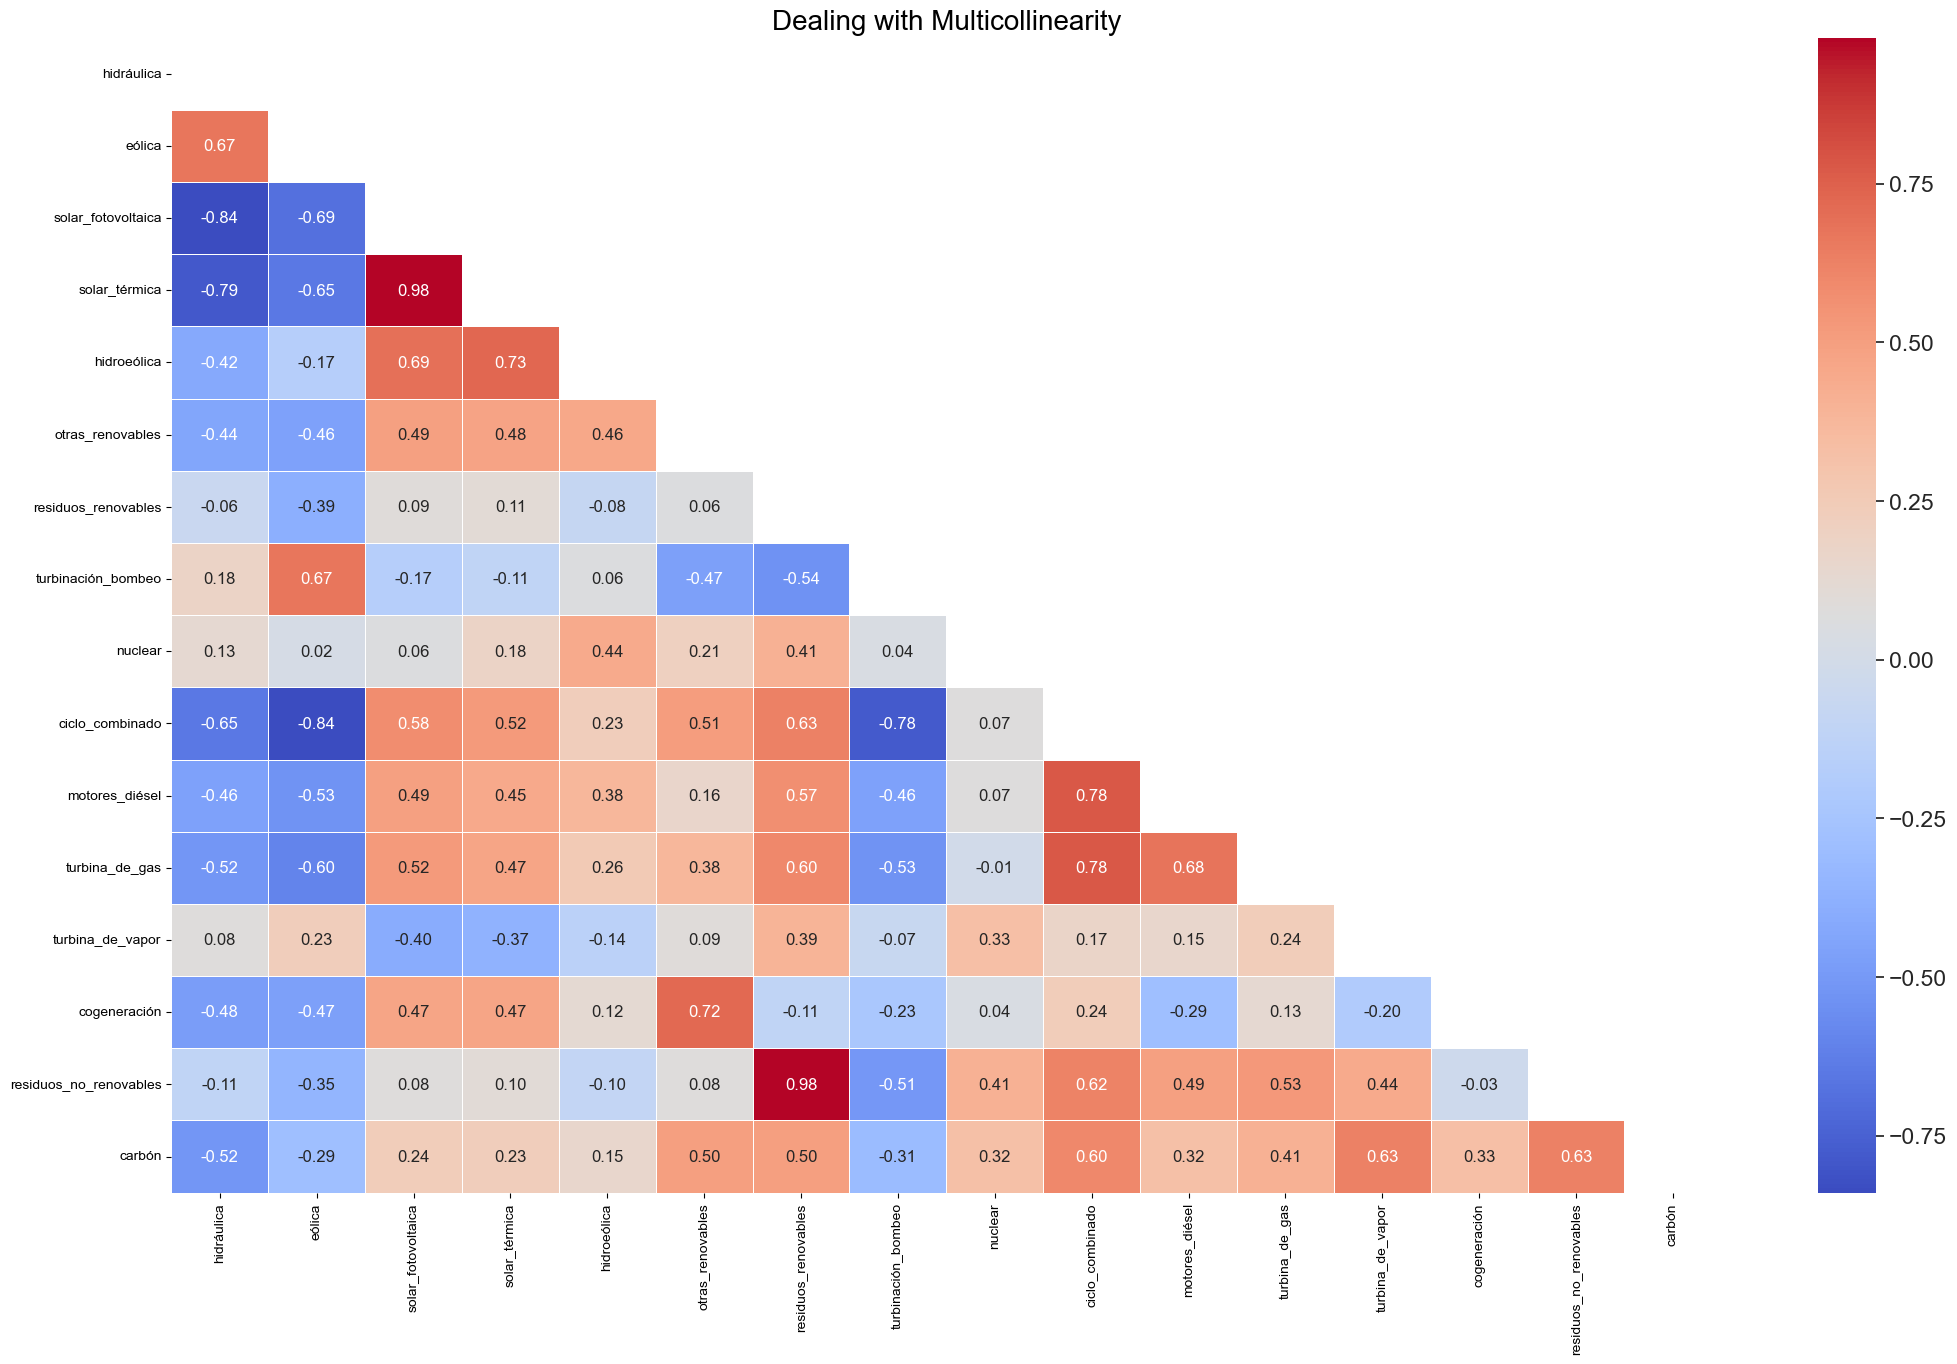

In [9]:
total = 'carbón'
columna_extraida = fuente.pop(total)
fuente[total] = columna_extraida


# Correlation Matrix-Heatmap Plot
fuente_corr = round(fuente.corr(), 2)

mask = np.zeros_like(fuente_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(fuente_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

Ideas que vemos con este heatmap de multicolinealidades:
1. La interatuación de las energías renovables entre ellas. Al ser de origen natural y que no tiene que ver con el ser humano, existe ciertos paradigmas que interactual entre ellos. Un día de lluvia que favorece el aumento de la energía hidraulica podrá ir acompañado con un día de más viento. 

<h2 style='color:#d48a13'> 03. PROCESAMIENTO DE LOS DATOS

In [10]:
#Normalizamos las columnas
minimos = fuente.min()
maximos = fuente.max()
fuente = (fuente - minimos) / (maximos - minimos)

#Eliminamos los outlier
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

outlier_slayer(fuente)


,hidráulica,eólica,solar_fotovoltaica,solar_térmica,hidroeólica,otras_renovables,residuos_renovables,turbinación_bombeo,nuclear,ciclo_combinado,motores_diésel,turbina_de_gas,turbina_de_vapor,cogeneración,residuos_no_renovables,carbón
ene/23,0.962380,1.000000,0.000000,0.040599,0.520878,0.447133,0.595968,0.803852,0.973662,0.000000,0.112233,0.460394,0.952659,0.317859,0.582535,0.394215
feb/23,0.503559,0.364571,0.144994,0.128278,0.166723,1.000000,0.696596,0.000000,0.619819,0.724167,0.222753,0.318300,0.953282,0.986503,0.798030,0.921355
mar/23,0.365825,0.825429,0.480852,0.470183,0.487603,0.584416,0.704269,0.796103,0.984901,0.177168,0.000000,0.083229,0.540231,1.000000,0.892256,1.000000
abr/23,0.198147,0.416024,0.723339,0.789355,0.487991,0.291504,0.328183,1.000000,0.597590,0.072664,0.082627,0.059203,0.123115,0.797644,0.361524,0.179457
jun/23,0.323043,0.000000,0.749010,0.664693,0.157827,0.701038,0.936018,0.079300,0.193271,0.857845,0.402185,0.852756,0.000704,0.997758,0.937394,0.419393
jul/23,0.122686,0.177998,1.000000,1.000000,1.000000,0.684469,1.000000,0.161817,1.000000,0.978644,0.787587,1.000000,0.465125,0.672227,1.000000,0.570971
ago/23,0.012155,0.270890,0.965302,0.928450,0.974424,0.853695,0.837112,0.445784,0.916844,1.000000,1.000000,0.639128,0.587273,0.443368,0.875230,0.957177
sep/23,0.000000,0.117791,0.575922,0.456646,0.376433,0.391085,0.740869,0.259607,0.582798,0.942095,0.504355,0.563285,0.592871,0.611251,0.818163,0.889764
oct/23,0.169394,0.613102,0.314889,0.199206,0.000000,0.205717,0.816344,0.642305,0.000000,0.601542,0.611916,0.779701,1.000000,0.365201,0.875217,0.757654
nov/23,0.827788,0.894436,0.089137,0.028435,0.279262,0.000000,0.475064,0.540709,0.014176,0.075835,0.314879,0.000000,0.173446,0.000000,0.525473,0.041565


### 03.1 X-y Split

In [11]:
columnas_a_eliminar=['carbón','hidráulica','eólica','ciclo_combinado']

X = fuente.drop(columnas_a_eliminar, axis=1)
y = fuente["carbón"]

### 03.2 Creación del modelo

### 03.2.1 Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(f'100% of our data: {len(fuente)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 12.
80% for training data: 8.
20% for test data: 4.


### 03.2.2 Selecting the Model: Linear Regression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 03.2.2.1 Modelo de  Validacion

In [15]:
predictionslr = model.predict(X_test)
print(f'20% for test prediction data: {len(predictionslr)}.')

20% for test prediction data: 4.


### 03.2.2.2 Métricas.

In [16]:
r2_lr = r2_score(y_test, predictionslr)
RMSE_lr = root_mean_squared_error(y_test, predictionslr)
MSE_lr = mean_squared_error(y_test, predictionslr)
MAE_lr = mean_absolute_error(y_test, predictionslr)

print("R2 = ", round(r2_lr, 4))
print("RMSE = ", round(RMSE_lr, 4))
print("The value of the metric MSE is ", round(MSE_lr, 4))
print("MAE = ", round(MAE_lr, 4))

R2 =  -1.0754
RMSE =  0.4767
The value of the metric MSE is  0.2272
MAE =  0.4346


### 03.2.3 Selecting the Model: Ridge

In [17]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

### 03.2.3.1 Modelo de Validacion

In [18]:
predictions_ridge = ridge.predict(X_test)

### 03.2.3.2 Métricas

In [19]:
r2_rg = r2_score(y_test, predictions_ridge)
RMSE_rg = root_mean_squared_error(y_test, predictions_ridge)
MSE_rg = mean_squared_error(y_test, predictions_ridge)  
MAE_rg = mean_absolute_error(y_test, predictions_ridge)


print("R2 = ", round(r2_rg, 4))
print("RMSE = ", round(RMSE_rg, 4))
print("The value of the metric MSE is ", round(MSE_rg, 4))
print("MAE = ", round(MAE_rg, 4))

R2 =  0.3242
RMSE =  0.272
The value of the metric MSE is  0.074
MAE =  0.2307


### 03.2.4 Selecting the Model: Lasso Regression

In [20]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

### 03.2.4.1 Modelo de Validacion

In [21]:
predictions_lasso = lasso.predict(X_test)

### 03.2.4.2 Métricas

In [22]:
r2_ls = r2_score(y_test, predictions_lasso)
RMSE_ls = root_mean_squared_error(y_test, predictions_lasso)
MSE_ls = mean_squared_error(y_test, predictions_lasso) 
MAE_ls = mean_absolute_error(y_test, predictions_lasso)

#Printing the results
print("R2 = ", round(r2_ls, 4))
print("RMSE = ", round(RMSE_ls, 4))
print("The value of the metric MSE is ", round(MSE_ls, 4))
print("MAE = ", round(MAE_ls, 4))

R2 =  -0.0
RMSE =  0.3309
The value of the metric MSE is  0.1095
MAE =  0.3029


### 03.2.5 Selecting the Model: KNN Regresion

In [23]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

### 03.2.5.1 Modelo de Validacion

In [24]:
predictions_knn = knn.predict(X_test)

### 03.2.5.2 Métricas

In [25]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = root_mean_squared_error(y_test, predictions_knn)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.2501
RMSE =  0.2865
The value of the metric MSE is  0.0821
MAE =  0.2765


### 03.2.6 Selecting the Model: XGBoost Regression

In [26]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

### 03.2.6.1 Modelo de Validacion

In [27]:
predictions_xgb = xgbr.predict(X_test)

### 03.2.6.2 Métricas

In [28]:
r2_xg = r2_score(y_test, predictions_xgb)
RMSE_xg = root_mean_squared_error(y_test, predictions_xgb)
MSE_xg = mean_squared_error(y_test, predictions_xgb)
MAE_xg = mean_absolute_error(y_test, predictions_xgb)

print("R2 = ", round(r2_xg, 4))
print("RMSE = ", round(RMSE_xg, 4))
print("The value of the metric MSE is ", round(MSE_xg, 4))
print("MAE = ", round(MAE_xg, 4))

R2 =  0.694
RMSE =  0.183
The value of the metric MSE is  0.0335
MAE =  0.1318


### 03.2.7 Selecting the Model: Decision Tree

In [29]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 03.2.7.1 Modelo de Validación

In [30]:
predictions_tree = tree.predict(X_test)

### 03.2.7.2 Métricas

In [31]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = root_mean_squared_error(y_test, predictions_tree)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  -0.0038
RMSE =  0.3315
The value of the metric MSE is  0.1099
MAE =  0.25


### 03.3. Comparación

In [32]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso',  'KNN', 'XGBoost','Decision Tree'],
    'R²': [r2_lr, r2_rg, r2_ls, r2_knn, r2_xg, r2_tree],
    'RMSE': [RMSE_lr, RMSE_rg, RMSE_ls, RMSE_knn, RMSE_xg, RMSE_tree],
    'MSE': [MSE_lr, MSE_rg, MSE_ls, MSE_knn, MSE_xg, MSE_tree],
    'MAE': [MAE_lr, MAE_rg, MAE_ls, MAE_knn, MAE_xg, MAE_tree]
}

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,KNN,XGBoost,Decision Tree
R²,-1.075433,0.324190,-0.000023,0.250124,0.694020,-0.003798
RMSE,0.476676,0.272008,0.330883,0.286526,0.183027,0.331507
MSE,0.227220,0.073988,0.109483,0.082097,0.033499,0.109897
MAE,0.434638,0.230693,0.302909,0.276484,0.131769,0.249983


<h2 style='color:#d48a13'>04 Reporting

In [33]:
series_pred = pd.Series(predictions_xgb, name='predictions')
series_y_test = pd.Series(y_test, name='actual')
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df.head(20)

,actual,predictions
0,0.041565,0.081288
1,0.757654,0.822315
2,0.394215,0.745030
3,0.889764,0.817887


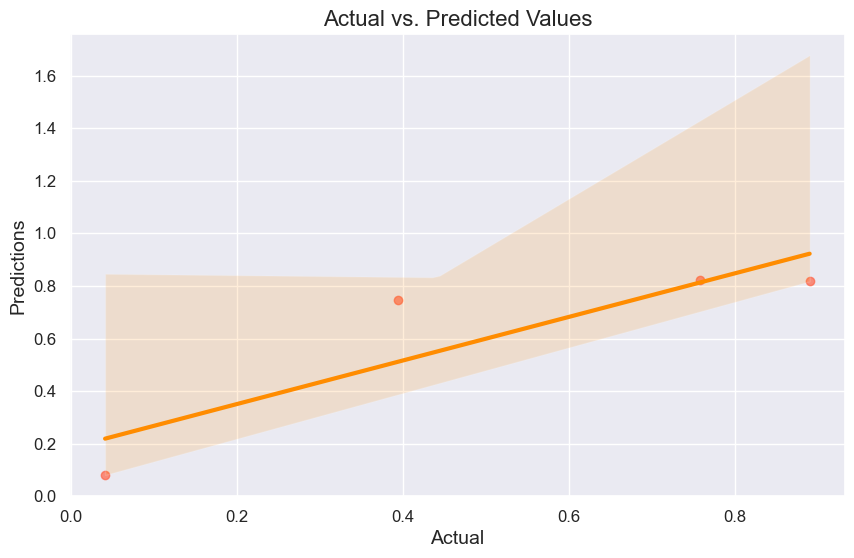

In [34]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [35]:
#elimino la columna de 'fuel_+_gas' por la insignificancia de sus resultado y las columnas que hacen de sumatorio de la generación de energía

fuente.corrwith(fuente["ciclo_combinado"]).sort_values(ascending=False)

ciclo_combinado           1.000000
turbina_de_gas            0.783884
motores_diésel            0.780871
residuos_renovables       0.633513
residuos_no_renovables    0.615353
carbón                    0.596968
solar_fotovoltaica        0.576704
solar_térmica             0.517880
otras_renovables          0.512590
cogeneración              0.243097
hidroeólica               0.233629
turbina_de_vapor          0.166218
nuclear                   0.069754
hidráulica               -0.650758
turbinación_bombeo       -0.782404
eólica                   -0.844547
dtype: float64

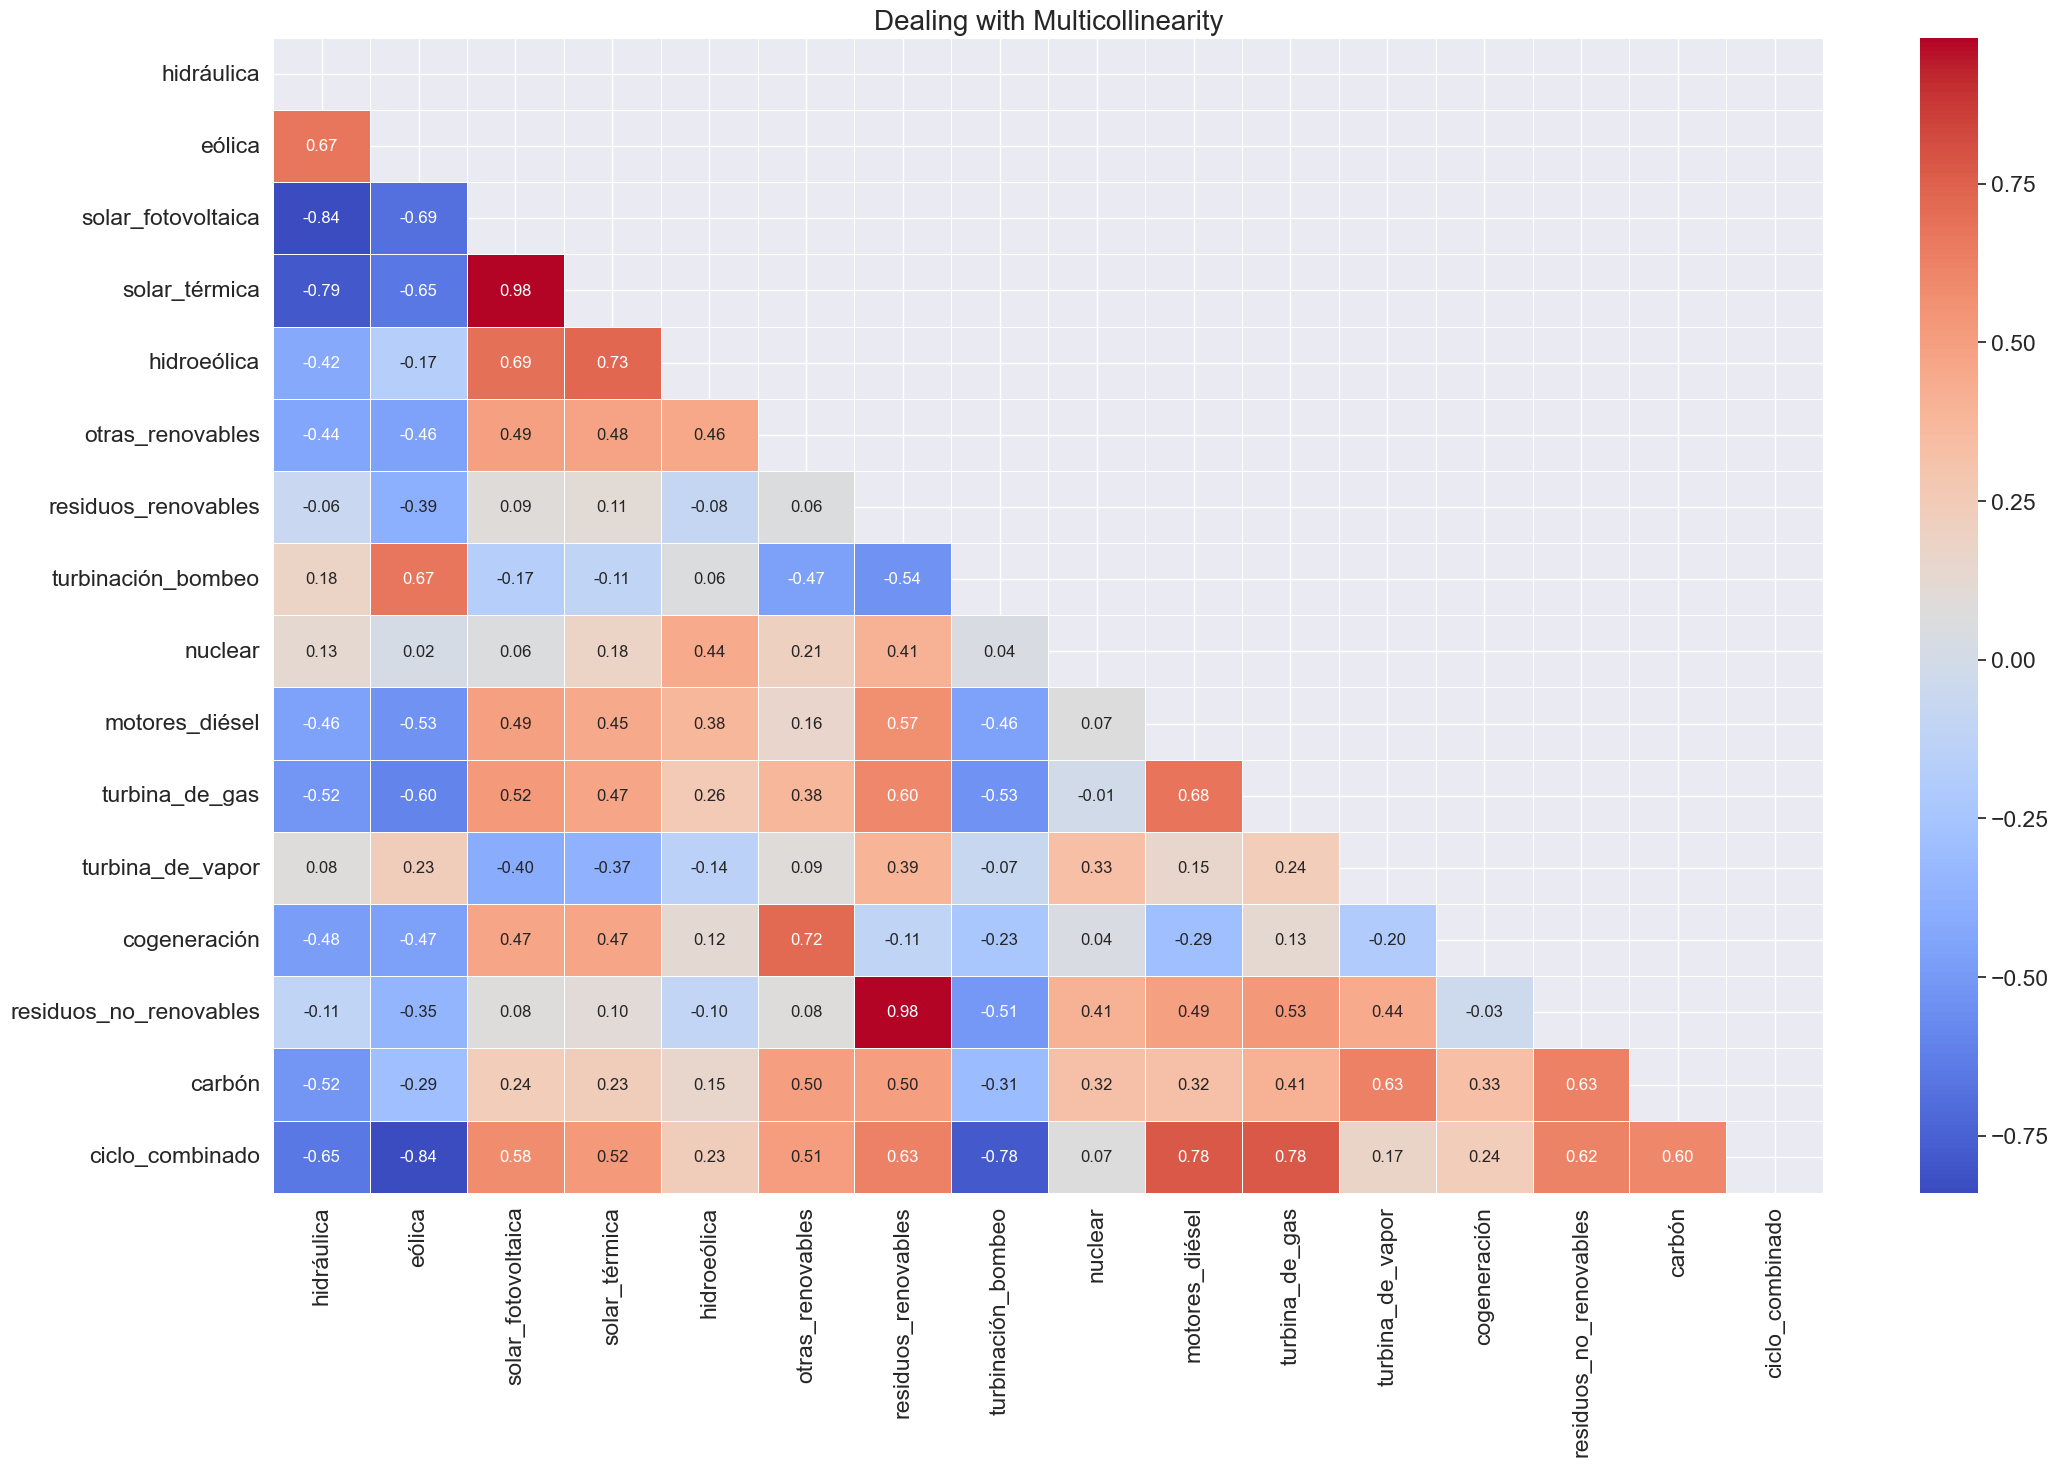

In [36]:
total = 'ciclo_combinado'
columna_extraida = fuente.pop(total)
fuente[total] = columna_extraida


# Correlation Matrix-Heatmap Plot
fuente_corr = round(fuente.corr(), 2)

mask = np.zeros_like(fuente_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(fuente_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<h2 style='color:#d48a13'> 03. PROCESAMIENTO DE LOS DATOS

### 03.1 X-y Split

In [37]:
columnas_a_eliminar=['ciclo_combinado','turbina_de_gas','motores_diésel','residuos_renovables']

X = fuente.drop(columnas_a_eliminar, axis=1)
y = fuente["ciclo_combinado"]

In [38]:
fuente.columns

Index(['hidráulica', 'eólica', 'solar_fotovoltaica', 'solar_térmica',
       'hidroeólica', 'otras_renovables', 'residuos_renovables',
       'turbinación_bombeo', 'nuclear', 'motores_diésel', 'turbina_de_gas',
       'turbina_de_vapor', 'cogeneración', 'residuos_no_renovables', 'carbón',
       'ciclo_combinado'],
      dtype='object')

### 03.2 Creación del modelo

### 03.2.1 Train-Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print(f'100% of our data: {len(fuente)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 12.
80% for training data: 8.
20% for test data: 4.


### 03.2.2 Selecting the Model: Linear Regression

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 03.2.2.1 Modelo de  Validacion

In [42]:
predictionslr = model.predict(X_test)
print(f'20% for test prediction data: {len(predictionslr)}.')

20% for test prediction data: 4.


### 03.2.2.2 Métricas.

In [43]:
r2_lr = r2_score(y_test, predictionslr)
RMSE_lr = root_mean_squared_error(y_test, predictionslr)
MSE_lr = mean_squared_error(y_test, predictionslr)
MAE_lr = mean_absolute_error(y_test, predictionslr)

print("R2 = ", round(r2_lr, 4))
print("RMSE = ", round(RMSE_lr, 4))
print("The value of the metric MSE is ", round(MSE_lr, 4))
print("MAE = ", round(MAE_lr, 4))

R2 =  0.8534
RMSE =  0.1482
The value of the metric MSE is  0.022
MAE =  0.139


### 03.2.3 Selecting the Model: Ridge

In [44]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

### 03.2.3.1 Modelo de Validacion

In [45]:
predictions_ridge = ridge.predict(X_test)

### 03.2.3.2 Métricas

In [46]:
r2_rg = r2_score(y_test, predictions_ridge)
RMSE_rg = root_mean_squared_error(y_test, predictions_ridge)
MSE_rg = mean_squared_error(y_test, predictions_ridge)  
MAE_rg = mean_absolute_error(y_test, predictions_ridge)


print("R2 = ", round(r2_rg, 4))
print("RMSE = ", round(RMSE_rg, 4))
print("The value of the metric MSE is ", round(MSE_rg, 4))
print("MAE = ", round(MAE_rg, 4))

R2 =  0.762
RMSE =  0.1889
The value of the metric MSE is  0.0357
MAE =  0.1788


### 03.2.4 Selecting the Model: Lasso Regression

In [47]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

### 03.2.4.1 Modelo de Validacion

In [48]:
predictions_lasso = lasso.predict(X_test)

### 03.2.4.2 Métricas

In [49]:
r2_ls = r2_score(y_test, predictions_lasso)
RMSE_ls = root_mean_squared_error(y_test, predictions_lasso)
MSE_ls = mean_squared_error(y_test, predictions_lasso) 
MAE_ls = mean_absolute_error(y_test, predictions_lasso)

#Printing the results
print("R2 = ", round(r2_ls, 4))
print("RMSE = ", round(RMSE_ls, 4))
print("The value of the metric MSE is ", round(MSE_ls, 4))
print("MAE = ", round(MAE_ls, 4))

R2 =  -0.1162
RMSE =  0.409
The value of the metric MSE is  0.1673
MAE =  0.367


### 03.2.5 Selecting the Model: KNN Regresion

In [50]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

### 03.2.5.1 Modelo de Validacion

In [51]:
predictions_knn = knn.predict(X_test)

### 03.2.5.2 Métricas

In [52]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = root_mean_squared_error(y_test, predictions_knn)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.458
RMSE =  0.285
The value of the metric MSE is  0.0812
MAE =  0.2668


### 03.2.6 Selecting the Model: XGBoost Regression

In [53]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

### 03.2.6.1 Modelo de Validacion

In [54]:
predictions_xgb = xgbr.predict(X_test)

### 03.2.6.2 Métricas

In [55]:
r2_xg = r2_score(y_test, predictions_xgb)
RMSE_xg = root_mean_squared_error(y_test, predictions_xgb)
MSE_xg = mean_squared_error(y_test, predictions_xgb)
MAE_xg = mean_absolute_error(y_test, predictions_xgb)

print("R2 = ", round(r2_xg, 4))
print("RMSE = ", round(RMSE_xg, 4))
print("The value of the metric MSE is ", round(MSE_xg, 4))
print("MAE = ", round(MAE_xg, 4))

R2 =  0.672
RMSE =  0.2217
The value of the metric MSE is  0.0492
MAE =  0.1865


### 03.2.7 Selecting the Model: Decision Tree

In [56]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 03.2.7.1 Modelo de Validación

In [57]:
predictions_tree = tree.predict(X_test)

### 03.2.7.2 Métricas

In [58]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = root_mean_squared_error(y_test, predictions_tree)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.629
RMSE =  0.2358
The value of the metric MSE is  0.0556
MAE =  0.2053


### 03.3. Comparación

In [59]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso',  'KNN', 'XGBoost','Decision Tree'],
    'R²': [r2_lr, r2_rg, r2_ls, r2_knn, r2_xg, r2_tree],
    'RMSE': [RMSE_lr, RMSE_rg, RMSE_ls, RMSE_knn, RMSE_xg, RMSE_tree],
    'MSE': [MSE_lr, MSE_rg, MSE_ls, MSE_knn, MSE_xg, MSE_tree],
    'MAE': [MAE_lr, MAE_rg, MAE_ls, MAE_knn, MAE_xg, MAE_tree]
}

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,KNN,XGBoost,Decision Tree
R²,0.853429,0.761963,-0.116165,0.458048,0.671984,0.629032
RMSE,0.148211,0.188876,0.408996,0.284994,0.221719,0.235789
MSE,0.021966,0.035674,0.167278,0.081222,0.049159,0.055596
MAE,0.138992,0.178845,0.366951,0.266752,0.186491,0.205314


<h2 style='color:#d48a13'>04 Reporting

In [60]:
series_pred = pd.Series(predictionslr, name='predictions')
series_y_test = pd.Series(y_test, name='actual')
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df.head(20)

,actual,predictions
0,0.075835,0.298311
1,0.601542,0.491330
2,0.000000,0.086175
3,0.942095,0.804993


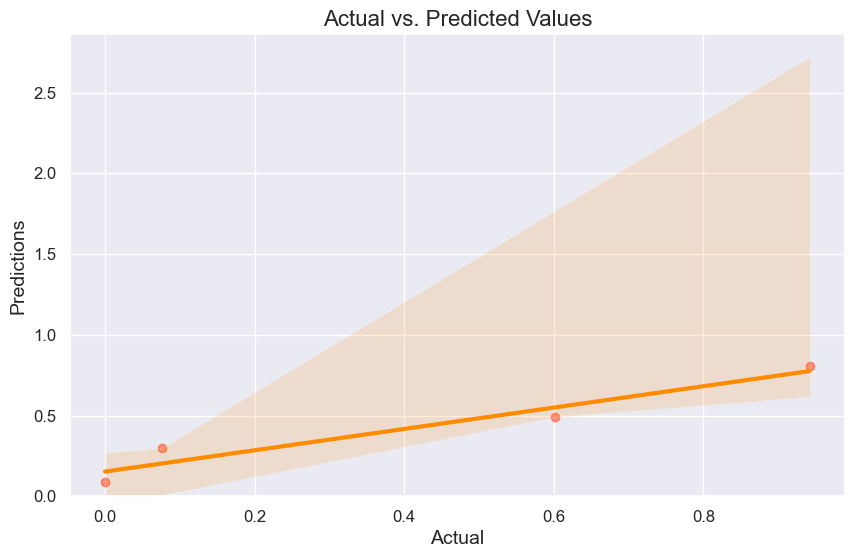

In [61]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()